# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#url
core_url = "http://api.openweathermap.org/data/2.5/weather?"

#define units to be used
units = "imperial"

#create full url without city name
url = f"{core_url}appid={weather_api_key}&units={units}&q="

#print to make sure the weather key appended correctly 
print(url)

http://api.openweathermap.org/data/2.5/weather?appid=bde191f3a1ce139abd3a45a3394aec28&units=imperial&q=


In [5]:
#create holding lists for data we need to extract
city_name = []
country = []
date = []
lat = []
lng = []
temperature = []
humidity = []
clouds = []
wind = []


for city in cities:
    try:
        #get the data into json format
        response = requests.get(url + city).json()
        
        #store data into lists
        date.append(response["dt"])
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        clouds.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        country.append(response['sys']['country'])
        print(f"Data Collection complete for {city}")
        print('---------------------------------')
 
    except KeyError:
        print(f'Data Missing, moving on to next city..')
        
print("Data Collection for all cities complete")

Data Collection complete for puteyets
---------------------------------
Data Collection complete for svetlogorsk
---------------------------------
Data Collection complete for torbay
---------------------------------
Data Collection complete for yellowknife
---------------------------------
Data Collection complete for barrow
---------------------------------
Data Collection complete for butaritari
---------------------------------
Data Collection complete for rikitea
---------------------------------
Data Collection complete for bluff
---------------------------------
Data Collection complete for pevek
---------------------------------
Data Collection complete for steamboat springs
---------------------------------
Data Collection complete for vaini
---------------------------------
Data Collection complete for krasnoselkup
---------------------------------
Data Collection complete for hilo
---------------------------------
Data Missing, moving on to next city..
Data Collection comple

Data Collection complete for lavrentiya
---------------------------------
Data Collection complete for leningradskiy
---------------------------------
Data Collection complete for broken hill
---------------------------------
Data Collection complete for san patricio
---------------------------------
Data Collection complete for sheksna
---------------------------------
Data Collection complete for usinsk
---------------------------------
Data Collection complete for isangel
---------------------------------
Data Collection complete for stonewall
---------------------------------
Data Collection complete for klagenfurt
---------------------------------
Data Collection complete for saint-michel-des-saints
---------------------------------
Data Collection complete for puerto ayacucho
---------------------------------
Data Collection complete for hasaki
---------------------------------
Data Collection complete for sao domingos
---------------------------------
Data Collection complete fo

Data Collection complete for cabra
---------------------------------
Data Collection complete for hilton head island
---------------------------------
Data Collection complete for sur
---------------------------------
Data Collection complete for bethel
---------------------------------
Data Collection complete for manokwari
---------------------------------
Data Collection complete for zorritos
---------------------------------
Data Collection complete for nanortalik
---------------------------------
Data Collection complete for methana
---------------------------------
Data Collection complete for punta cardon
---------------------------------
Data Collection complete for sambava
---------------------------------
Data Collection complete for saldanha
---------------------------------
Data Missing, moving on to next city..
Data Collection complete for ghatal
---------------------------------
Data Collection complete for samarai
---------------------------------
Data Missing, moving on

Data Collection complete for lebu
---------------------------------
Data Collection complete for morris
---------------------------------
Data Collection complete for makakilo city
---------------------------------
Data Collection complete for oranjestad
---------------------------------
Data Collection complete for laguna
---------------------------------
Data Missing, moving on to next city..
Data Collection complete for porto novo
---------------------------------
Data Collection complete for bowen
---------------------------------
Data Collection complete for najran
---------------------------------
Data Collection complete for villa bruzual
---------------------------------
Data Collection complete for hlukhiv
---------------------------------
Data Collection complete for ayan
---------------------------------
Data Collection complete for aksu
---------------------------------
Data Collection complete for hohhot
---------------------------------
Data Collection complete for dali
-

Data Collection complete for diego de almagro
---------------------------------
Data Collection complete for abrau-dyurso
---------------------------------
Data Collection complete for teguldet
---------------------------------
Data Collection complete for gallup
---------------------------------
Data Collection complete for madang
---------------------------------
Data Collection complete for quballat
---------------------------------
Data Collection complete for burriana
---------------------------------
Data Collection complete for kabare
---------------------------------
Data Collection complete for bjornevatn
---------------------------------
Data Missing, moving on to next city..
Data Collection complete for mgachi
---------------------------------
Data Collection complete for hualmay
---------------------------------
Data Collection complete for porkhov
---------------------------------
Data Collection complete for stranda
---------------------------------
Data Collection comple

Data Collection complete for liberal
---------------------------------
Data Missing, moving on to next city..
Data Collection complete for den helder
---------------------------------
Data Collection complete for norsup
---------------------------------
Data Collection complete for raudeberg
---------------------------------
Data Collection complete for bilma
---------------------------------
Data Collection complete for belaya gora
---------------------------------
Data Collection complete for rayadrug
---------------------------------
Data Collection complete for bubaque
---------------------------------
Data Collection complete for mykhaylivka
---------------------------------
Data Collection complete for bandarbeyla
---------------------------------
Data Collection complete for soyo
---------------------------------
Data Collection complete for mana
---------------------------------
Data Collection complete for agua verde
---------------------------------
Data Collection complete f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_data = pd.DataFrame({
    "City" : city_name,
    "Country" : country,
    "Date" : date,
    "Latitude" : lat,
    "Longitude" : lng,
    "Temperatrue" : temperature,
    "Humidity" : humidity,
    "Cloudiness" : clouds,
    "Wind Speed" : wind })

weather_data

,City,Country,Date,Latitude,Longitude,Temperatrue,Humidity,Cloudiness,Wind Speed
0,Puteyets,RU,1612828631,65.1716,57.0910,-13.99,89,100,5.75
1,Forsytheganj,BY,1612828631,52.6333,29.7333,14.47,96,100,19.44
2,Torbay,CA,1612828631,47.6666,-52.7314,32.00,100,90,29.93
3,Yellowknife,CA,1612828631,62.4560,-114.3525,-27.40,68,90,17.27
4,Barrow,US,1612828631,71.2906,-156.7887,-31.00,84,1,11.50
...,...,...,...,...,...,...,...,...,...
572,Tsagan Aman,RU,1612828720,47.5639,46.7218,21.61,75,100,8.08
573,Singarāyakonda,IN,1612828720,15.2500,80.0333,67.60,85,30,4.38
574,Gizo Government Station,SB,1612828720,-8.1030,156.8419,85.06,71,91,8.63
575,Los Llanos de Aridane,ES,1612828721,28.6585,-17.9182,64.40,63,75,8.05


In [7]:
#export to CSV
weather_data.to_csv("weather_data.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
weather_data['Humidity'].value_counts()

88    30
78    26
86    23
85    21
94    19
      ..
27     1
29     1
31     1
33     1
24     1
Name: Humidity, Length: 84, dtype: int64

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
###None of the humidity is over 100% so I will skip this step. 


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

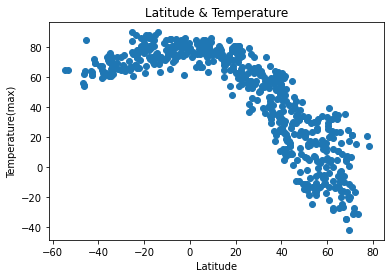

In [9]:
#create a scatter plot 
plt.scatter(weather_data['Latitude'],weather_data['Temperatrue'])

#set axis labels and title
plt.title('Latitude & Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature(max)')

#save as PNG
plt.savefig("Latitude&Temperature.png")

## Latitude vs. Humidity Plot

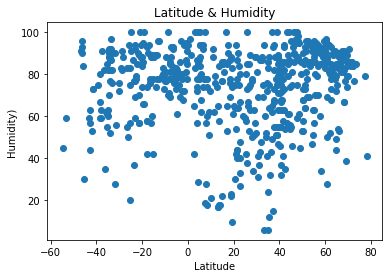

In [10]:
#create a scatter plot 
plt.scatter(weather_data['Latitude'],weather_data['Humidity'])

#set axis labels and title
plt.title('Latitude & Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity)')

#save as PNG
plt.savefig("Latitude&Humidity.png")

## Latitude vs. Cloudiness Plot

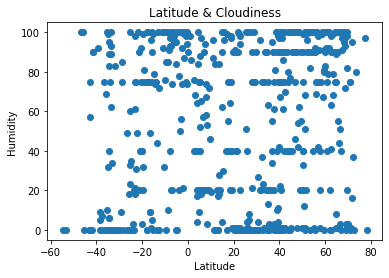

In [11]:
#create a scatter plot 
plt.scatter(weather_data['Latitude'],weather_data['Cloudiness'])

#set axis labels and title
plt.title('Latitude & Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#save as PNG
plt.savefig("Latitude&Cloudiness.png")

## Latitude vs. Wind Speed Plot

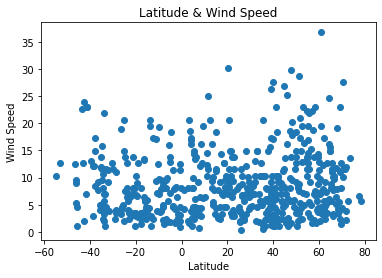

In [12]:
#create a scatter plot 
plt.scatter(weather_data['Latitude'],weather_data['Wind Speed'])

#set axis labels and title
plt.title('Latitude & Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

#save as PNG
plt.savefig("Latitude&WindSpeed.png")

## Linear Regression

In [14]:
#split data between northern and southern hemisphere (based on lat & long being 0)
northern_hem = weather_data.loc[weather_data["Latitude"] >= 0]
southern_hem = weather_data.loc[weather_data["Longitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-Squared value is 0.7637798907994688


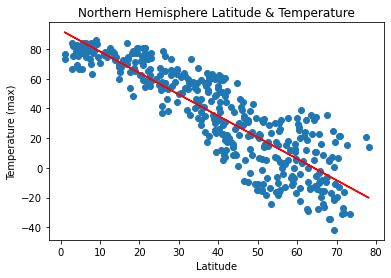

In [27]:
#Generate x & y data for chart
x = northern_hem["Latitude"]
y = northern_hem["Temperatrue"]

#run linregress to get values
(slope, intercept, rvalue, pvale, stderr) = linregress(x,y)

regress = x * slope + intercept 

line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x, regress, "r-")

#print r2 info
print(f"R-Squared value is {rvalue**2}")

#add chart info
plt.xlabel('Latitude')
plt.ylabel('Temperature (max)')
plt.title('Northern Hemisphere Latitude & Temperature')

#save image
plt.savefig("Northern Hemisphere Lat & Temp")


In [45]:
## The correlation of the Latitude & Temperature in the Northern hemisphere is quite strong with an Rvalue of .76. You could
## with some accuracy be able to estimate the temperature of a location based on the Latitude associated with it. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-Squared value is 0.5431019281526706


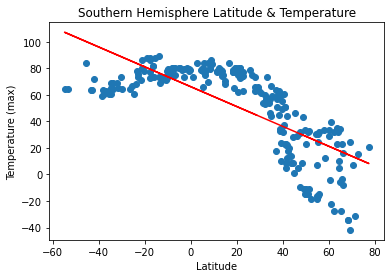

In [29]:
#Generate x & y data for chart
x = southern_hem["Latitude"]
y = southern_hem["Temperatrue"]

#run linregress to get values
(slope, intercept, rvalue, pvale, stderr) = linregress(x,y)

regress = x * slope + intercept 

line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x, regress, "r-")

#print r2 info
print(f"R-Squared value is {rvalue**2}")

#add chart info
plt.xlabel('Latitude')
plt.ylabel('Temperature (max)')
plt.title('Southern Hemisphere Latitude & Temperature')

#save image
plt.savefig("Southern Hemisphere Lat & Temp")

In [ ]:
## The correlation between 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-Squared value is 0.06052975364705664


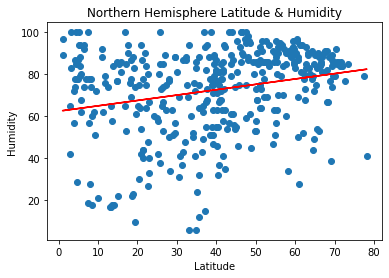

In [36]:
#Generate x & y data for chart
x = northern_hem["Latitude"]
y = northern_hem["Humidity"]

#run linregress to get values
(slope, intercept, rvalue, pvale, stderr) = linregress(x,y)

regress = x * slope + intercept 

line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x, regress, "r-")

#print r2 info
print(f"R-Squared value is {rvalue**2}")

#add chart info
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere Latitude & Humidity')

#save image
plt.savefig("Northern Hemisphere Lat & Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [44]:
## 

R-Squared value is 0.017353047210235978


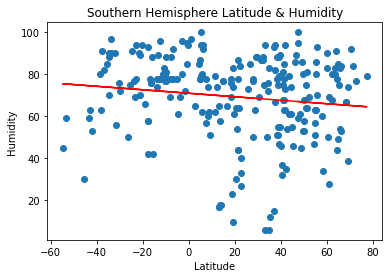

In [37]:
#Generate x & y data for chart
x = southern_hem["Latitude"]
y = southern_hem["Humidity"]

#run linregress to get values
(slope, intercept, rvalue, pvale, stderr) = linregress(x,y)

regress = x * slope + intercept 

line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x, regress, "r-")

#print r2 info
print(f"R-Squared value is {rvalue**2}")

#add chart info
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere Latitude & Humidity')

#save image
plt.savefig("Southern Hemisphere Lat & Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-Squared value is 0.04117479720401154


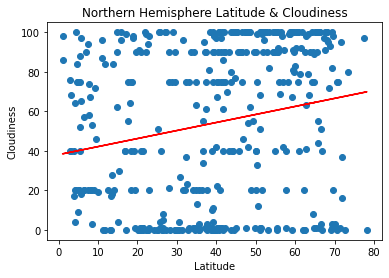

In [38]:
#Generate x & y data for chart
x = northern_hem["Latitude"]
y = northern_hem["Cloudiness"]

#run linregress to get values
(slope, intercept, rvalue, pvale, stderr) = linregress(x,y)

regress = x * slope + intercept 

line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x, regress, "r-")

#print r2 info
print(f"R-Squared value is {rvalue**2}")

#add chart info
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere Latitude & Cloudiness')

#save image
plt.savefig("Northern Hemisphere Lat & Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-Squared value is 0.021153987643503326


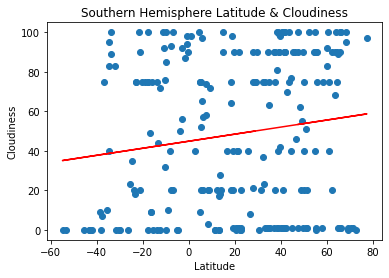

In [40]:
#Generate x & y data for chart
x = southern_hem["Latitude"]
y = southern_hem["Cloudiness"]

#run linregress to get values
(slope, intercept, rvalue, pvale, stderr) = linregress(x,y)

regress = x * slope + intercept 

line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x, regress, "r-")

#print r2 info
print(f"R-Squared value is {rvalue**2}")

#add chart info
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere Latitude & Cloudiness')

#save image
plt.savefig("Southern Hemisphere Lat & Cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-Squared value is 0.005412890628325554


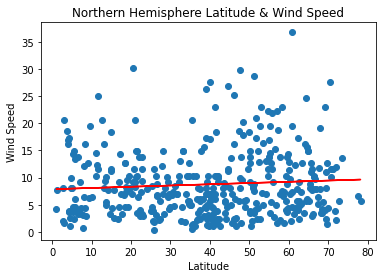

In [39]:
#Generate x & y data for chart
x = northern_hem["Latitude"]
y = northern_hem["Wind Speed"]

#run linregress to get values
(slope, intercept, rvalue, pvale, stderr) = linregress(x,y)

regress = x * slope + intercept 

line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x, regress, "r-")

#print r2 info
print(f"R-Squared value is {rvalue**2}")

#add chart info
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere Latitude & Wind Speed')

#save image
plt.savefig("Northern Hemisphere Lat & Wind Speed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-Squared value is 0.017550088823653866


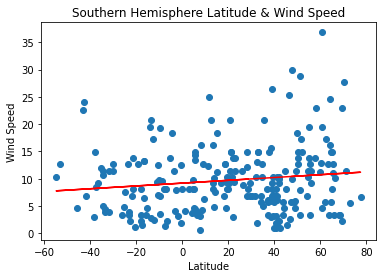

In [41]:
#Generate x & y data for chart
x = southern_hem["Latitude"]
y = southern_hem["Wind Speed"]

#run linregress to get values
(slope, intercept, rvalue, pvale, stderr) = linregress(x,y)

regress = x * slope + intercept 

line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x, regress, "r-")

#print r2 info
print(f"R-Squared value is {rvalue**2}")

#add chart info
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere Latitude & Wind Speed')

#save image
plt.savefig("Southern Hemisphere Lat & Wind Speed")